### PIZZA SALES ANALYSIS ###

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

### Imported the required libraries ###

In [88]:
df = pd.read_csv("pizza_sales.csv")

### Importing the Metadataset here ###

In [19]:
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [20]:
df.tail(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [21]:
print("The Metadata of the dataset: ",df.shape)

The Metadata of the dataset:  (48620, 12)


In [22]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


### Checking its Data Types ###

In [30]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [28]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


### Measuring KPI's here ###

In [57]:
total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = total_revenue / total_orders
avg_pizzas_per_order = total_pizzas_sold / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Avg Order Value: ${avg_order_value:,.2f}")
print(f"Avg Pizza per Order: {avg_pizzas_per_order:,.2f}")

Total Revenue: $817,860.05
Total Pizzas Sold: 49,574
Total Orders: 21,350
Avg Order Value: $38.31
Avg Pizza per Order: 2.32


### Chart's ###

### Ingredient Analysis ###

In [64]:
ingredient = (
                   df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'index':'count', 'pizza_ingredients':'indegredients'})
)
print(ingredient.head(10))
                     
                     

       indegredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


### Daily Trend - Total Orders ###

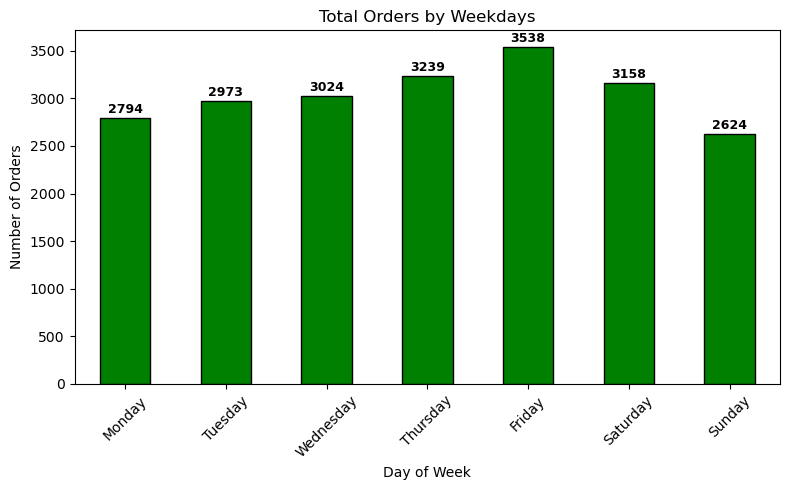

In [35]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title("Total Orders by Weekdays")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

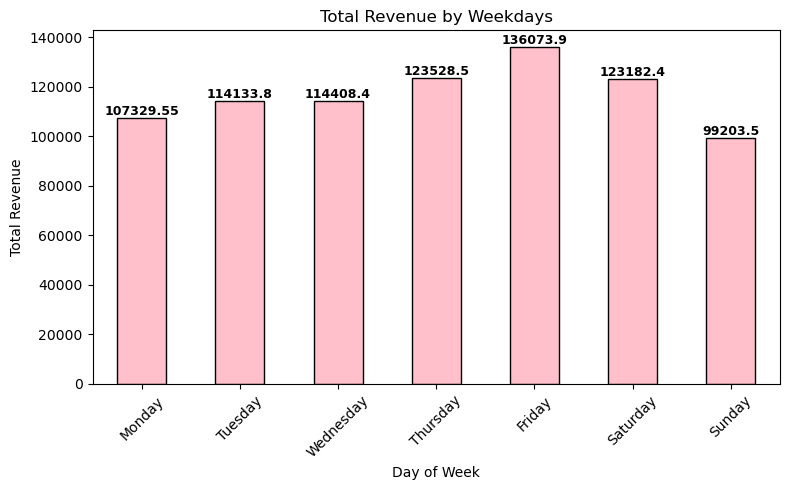

In [39]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='pink', edgecolor='black')

plt.title("Total Revenue by Weekdays")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Hourly Trend - Total Orders ###

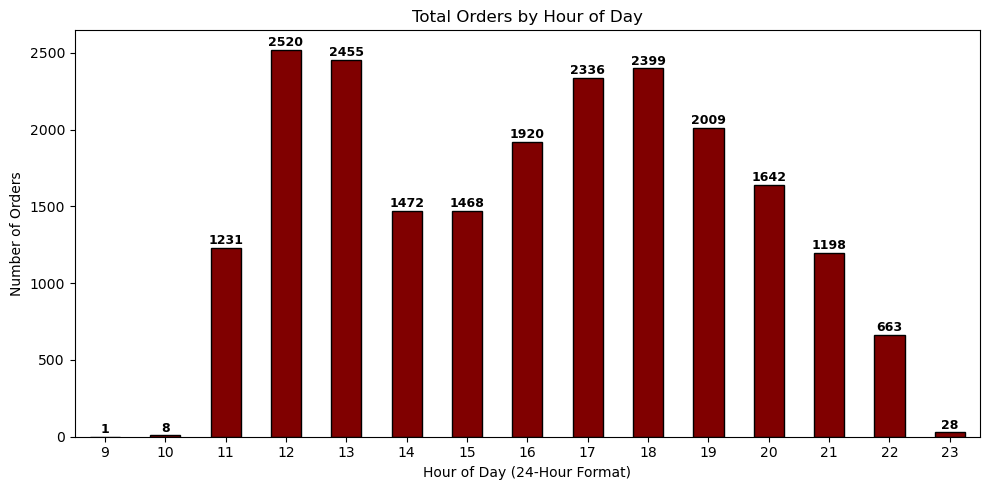

In [41]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['order_id' ].nunique()

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='maroon', edgecolor='black')

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Monthly Trend - Total Orders ###

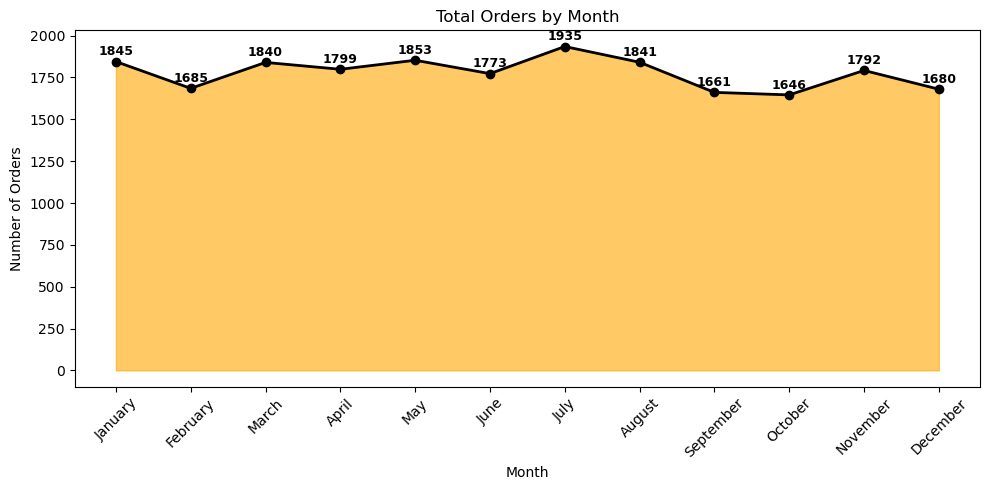

In [45]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['month_name' ] = df['order_date'].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June",
"July", "August", "September", "October", "November", "December"]

df['month_name' ] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color="orange", alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color="black", linewidth=2, marker='o')

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_month):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### % of Sales by Category

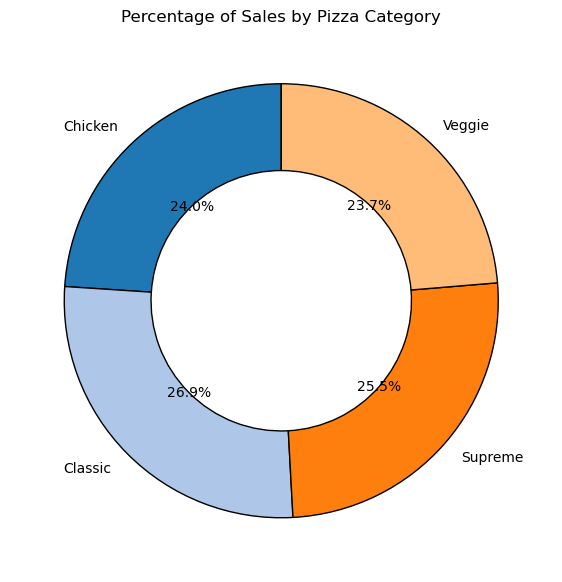

In [67]:
category_sales = df.groupby('pizza_category')['total_price'].sum()

category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(7,8))
colors = plt.get_cmap('tab20').colors # nice color palette

plt.pie(category_pct, labels=category_pct.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor':'black', 'width':0.4})
plt.title("Percentage of Sales by Pizza Category")
plt.show()


### % of Sales by Pizza Size & Category

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

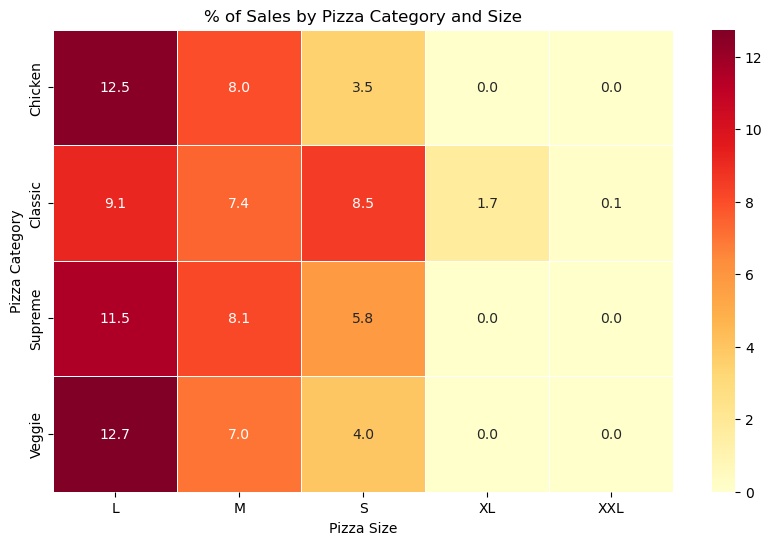

In [65]:
sales_pivot = df.pivot_table(
index='pizza_category',
columns='pizza_size',
values='total_price',
aggfunc='sum',
fill_value=0
)
sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("% of Sales by Pizza Category and Size")
plt.ylabel("Pizza Category")
plt.xlabel("Pizza Size")
plt.show()

### Total Pizzas Sold by Category

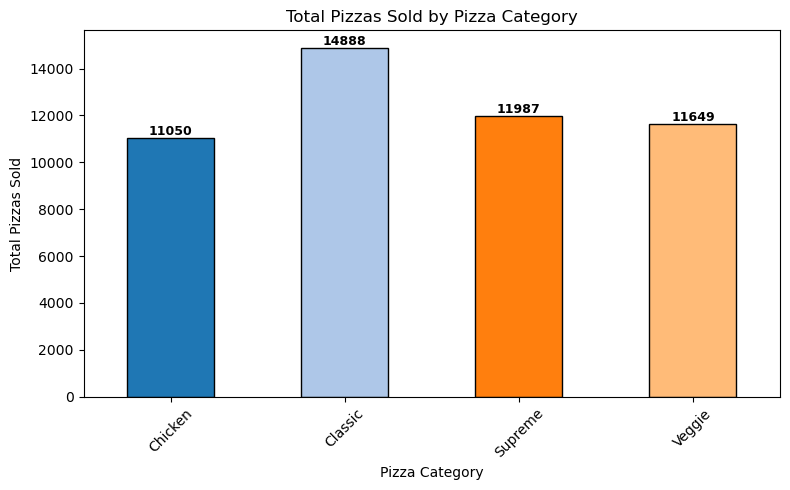

1

In [69]:
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

colors = list(plt.get_cmap('tab20').colors) # not mandatory to use but i used for multiple colors 

colors = colors[:len(pizzas_by_category)]

ax = pizzas_by_category.plot(kind='bar', figsize=(8,5), color=colors, edgecolor='black')

plt.title("Total Pizzas Sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(pizzas_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

1

### Top 5 Best-Selling Pizzas - Total Orders

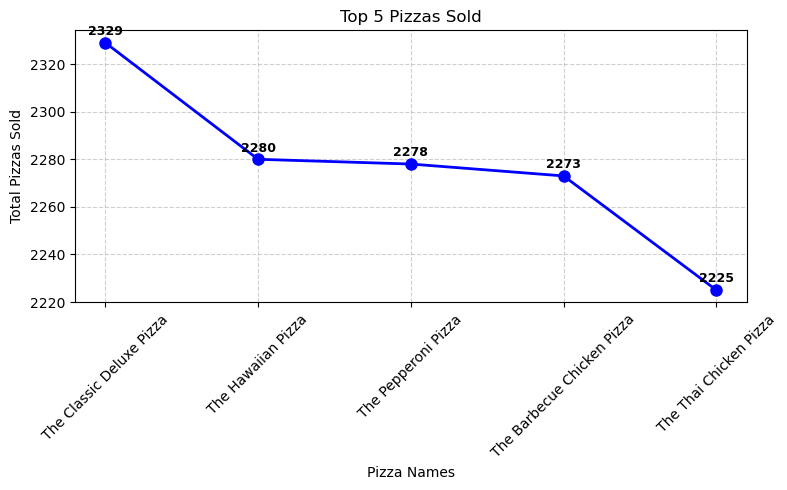

In [84]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top5.plot(kind='line', marker='o', color='b', linewidth=2, markersize=8)
plt.title("Top 5 Pizzas Sold")
plt.xlabel("Pizza Names")
plt.ylabel("Total Pizzas Sold")
plt.xticks(range(len(top5)), top5.index, rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
    
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Top 5 Best-Selling Pizzas - Total Sales

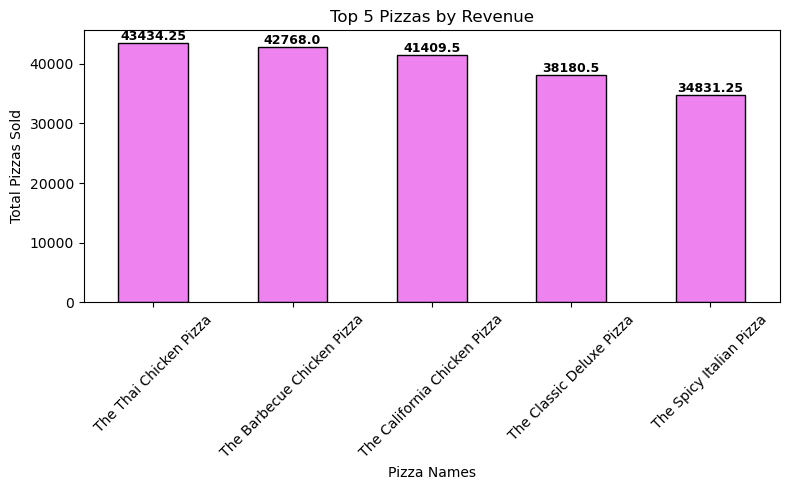

In [86]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='violet', edgecolor='black')
plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Names")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Bottom 5 Least-Selling Pizzas - Total Sales

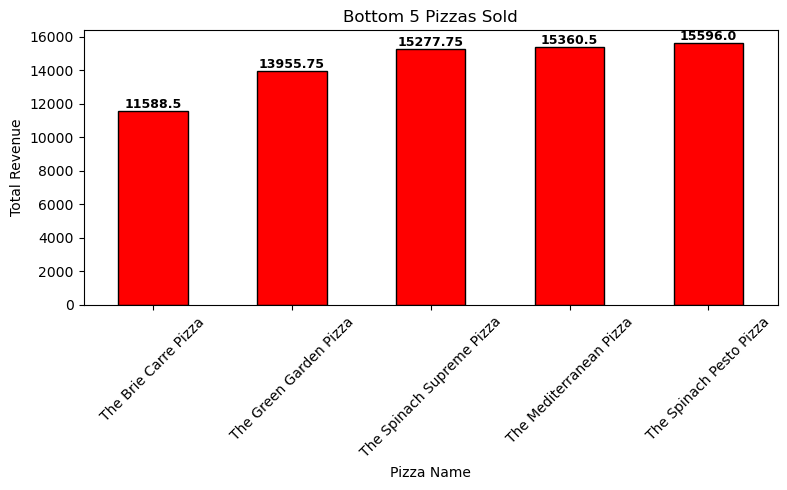

In [87]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()
bottom5 = pizzas_by_name.sort_values(ascending=True).head(5)

ax = bottom5.plot(kind='bar', figsize=(8,5), color='red', edgecolor='black')
plt.title("Bottom 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(bottom5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()